# 🧠 Modelo Predictivo – Neurocoach IA


🔍 Evaluación del Modelo
MAE: 0.52
R^2: 0.73


/var/folders/2l/nm_lmk3x1qj_fvlw2znxrpq00000gn/T/ipykernel_3328/2889125992.py:68: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/marccuestamunoz/repos/entorno-neurocoach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


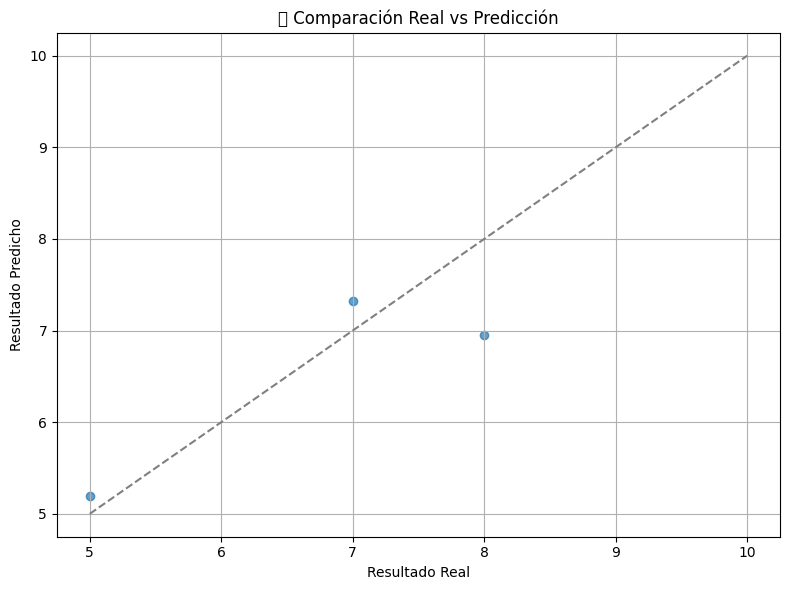

In [6]:

# 🧐 Modelo Predictivo Mejorado – Neurocoach IA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import os

# --- CARGA DE DATOS ---
ruta_csv = os.path.abspath(os.path.join('..', 'data', 'registro_cognitivo.csv'))
df = pd.read_csv(ruta_csv)

# --- PREPROCESAMIENTO ---
df = df.dropna()

# Extraer variables temporales
df['Datetime'] = pd.to_datetime(df['Fecha'] + ' ' + df['Hora'])
df['Dia_Semana'] = df['Datetime'].dt.day_name()
df['Hora_Num'] = df['Datetime'].dt.hour

# Crear variable binaria para "Punto clave"
df['Punto_clave_bin'] = df['Punto clave'].apply(lambda x: 0 if pd.isna(x) or x.strip() == '' else 1)

# Longitud del comentario
df['Comentario_longitud'] = df['Comentarios'].apply(lambda x: len(str(x)))

# One-hot encoding para variables categóricas
ohe = OneHotEncoder(sparse_output=False)
categoricas = ohe.fit_transform(df[['Tipo_tarea', 'Dia_Semana']])
cat_df = pd.DataFrame(categoricas, columns=ohe.get_feature_names_out(['Tipo_tarea', 'Dia_Semana']), index=df.index)

# Variables numéricas
numericas = df[['Energia', 'Estado_Animo', 'Hora_Num', 'Punto_clave_bin', 'Comentario_longitud']]

# Dataset final
X = pd.concat([numericas, cat_df], axis=1)
y = df['Resultado'].astype(float)

# --- DIVISIÓN EN TRAIN/TEST ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- ENTRENAMIENTO ---
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# --- PREDICCIÓN ---
y_pred = modelo.predict(X_test)

# --- EVALUACIÓN ---
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🔍 Evaluación del Modelo")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

# --- VISUALIZACIÓN ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Resultado Real")
plt.ylabel("Resultado Predicho")
plt.title("🌟 Comparación Real vs Predicción")
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualización importancia variables

/var/folders/2l/nm_lmk3x1qj_fvlw2znxrpq00000gn/T/ipykernel_3328/2809280441.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/marccuestamunoz/repos/entorno-neurocoach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


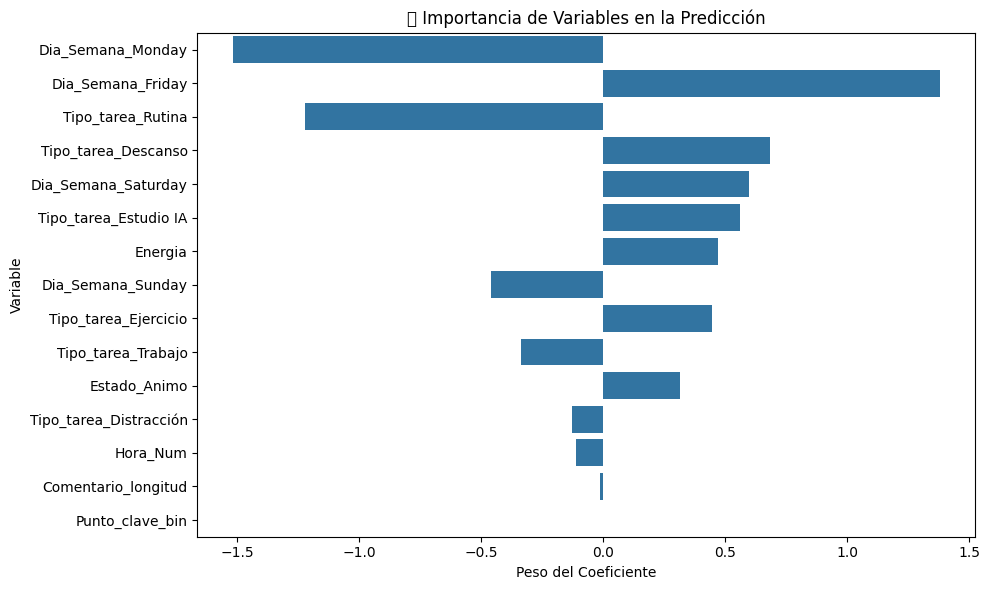

In [7]:
# --- IMPORTANCIA DE VARIABLES ---
importancia = pd.Series(modelo.coef_, index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importancia.values, y=importancia.index)
plt.title("📊 Importancia de Variables en la Predicción")
plt.xlabel("Peso del Coeficiente")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


# --- RANDOM FOREST REGRESSOR ---

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar modelo

In [9]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predicción

In [10]:
rf_pred = rf_model.predict(X_test)


# Evaluación

In [11]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\n🌲 Evaluación del Random Forest")
print(f"MAE: {rf_mae:.2f}")
print(f"R^2: {rf_r2:.2f}")


🌲 Evaluación del Random Forest
MAE: 1.10
R^2: -0.32


# Visualización

/var/folders/2l/nm_lmk3x1qj_fvlw2znxrpq00000gn/T/ipykernel_3328/763972084.py:8: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/marccuestamunoz/repos/entorno-neurocoach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


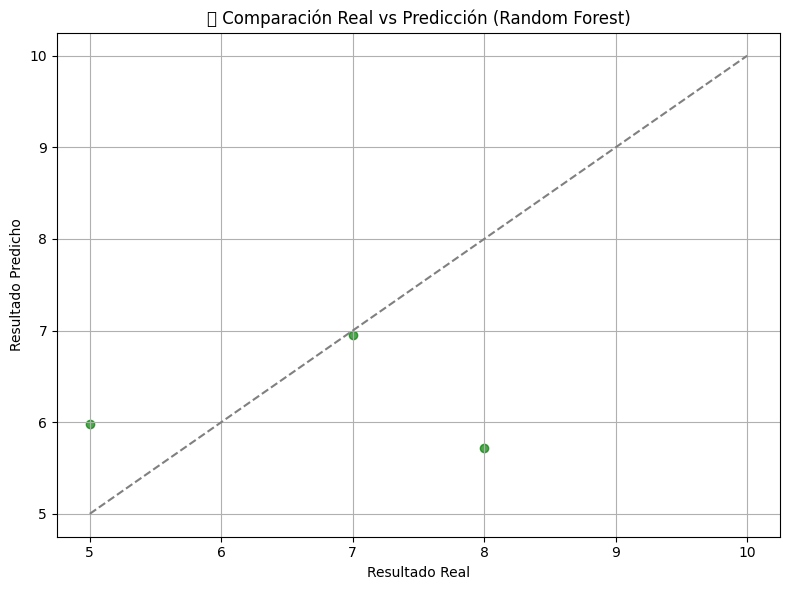

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel("Resultado Real")
plt.ylabel("Resultado Predicho")
plt.title("🌲 Comparación Real vs Predicción (Random Forest)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Importancia de variables

/var/folders/2l/nm_lmk3x1qj_fvlw2znxrpq00000gn/T/ipykernel_3328/2656809776.py:7: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/marccuestamunoz/repos/entorno-neurocoach/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


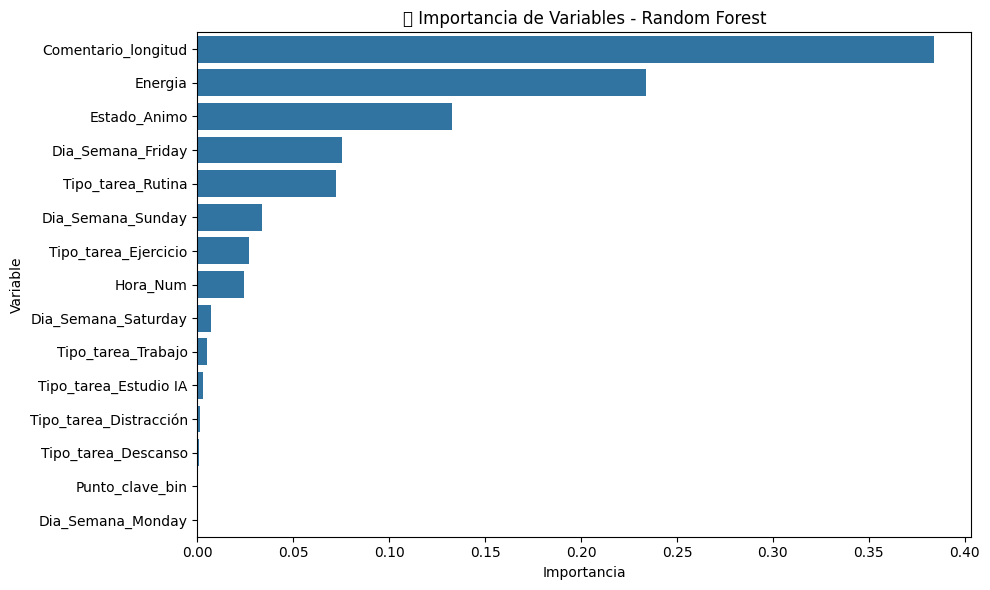

In [13]:
rf_importancia = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=rf_importancia.values, y=rf_importancia.index)
plt.title("🌲 Importancia de Variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()